# Time wrt number of levels

## Problem statement

In [ ]:
import numpy as np
import time
from SALib.sample import morris
import matplotlib.pyplot as plt

In [2]:
n_vars = 1000
n_tra  = 1

names = [str(i) for i in range(n_vars)]
bounds = np.array([np.zeros(n_vars),np.ones(n_vars)]).T

problem = {
    'num_vars':   n_vars,
    'names':      names,
    'bounds':     bounds,
    'num_tra':    n_tra
}

In [3]:
#Generate trajectories, algorithm from Chris

def generate_trajectory_2(num_parameters, levels=4, lower=0, upper=1):
    """
    Generate a trajectory for ``num_parameters``.
    
    Returns an array where the rows are steps in the trajectory, 
    and the columns are coordinates for each parameter. 
    
    The resulting array therefore has dimensions (num_parameters + 1, num_parameters).
    """
    
    pa = np.tile(np.linspace(lower, upper, levels), num_parameters).reshape((num_parameters, levels))
    starting_indices = np.random.randint(0, high=levels - 1, size=num_parameters)
    start = pa[np.arange(num_parameters), starting_indices]
    end = pa[np.arange(num_parameters), starting_indices - int(levels / 2)]
    order = np.random.permutation(np.arange(num_parameters)).reshape((1, -1))
    indices = np.arange(num_parameters + 1).reshape((-1, 1))
    
    start_dense = np.tile(start, num_parameters + 1).reshape((-1, num_parameters))
    end_dense = np.tile(end, num_parameters + 1).reshape((-1, num_parameters))
    
    mask = indices > order
    start_dense[mask] = end_dense[mask]

    return start_dense

In [4]:
#Compute time needed to generate trajectories
def compute_rtime(problem, alg, num_p):
    
    n_tra  = problem['num_tra']
    n_vars = problem['num_vars']
    
    try:
        running_time = np.zeros(len(num_p))
    except TypeError:
        running_time = 0

    i = 0
    
    
    if alg == "Chris":
        for p in num_p:
            t1 = time.time()
            samples = np.array([generate_trajectory_2(n_vars, levels=p) for n in range(n_tra)])
            t2 = time.time()
            running_time[i] = t2-t1
            i += 1
    elif alg == "salib":
        for p in num_p:
            t1 = time.time()
            samples = morris.sample(problem, n_tra, num_levels=p)
            t2 = time.time()
            running_time[i] = t2-t1
            i += 1
    return running_time

## Define number of levels

In [5]:
start = 100
end = 10000
step = 100
num_p = np.arange(start, end, step)

## Implementation Chris

In [6]:
#Generate trajectories
running_time_1 = compute_rtime(problem,'Chris',num_p)

## Implementation SALib

In [7]:
#Generate trajectories
running_time_2 = compute_rtime(problem,'salib',num_p)

# Plot

In [8]:
#Plot results
def plot_time(num_p,running_time,alg):
    #Plotting
    plt.figure(figsize=(5,5))
    plt.plot(num_p,running_time,'o',markersize=10)

    plt.tick_params(axis='x',which='both',labelsize=20)
    plt.tick_params(axis='y',which='both',labelsize=20)
    plt.xlabel('Number of levels',fontsize=25)
    plt.ylabel('Time, [s]',fontsize=25)
    plt.grid(True)
    plt.locator_params(axis='x', nbins=4)
    plt.title(alg,fontsize=30)

    plt.show()

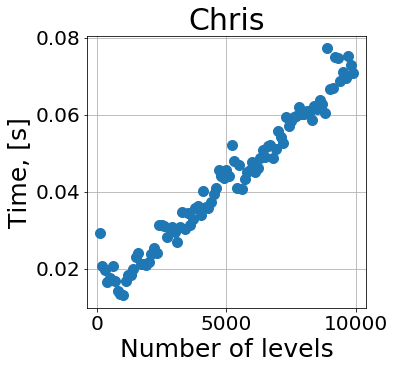

In [9]:
plot_time(num_p,running_time_1,'Chris')

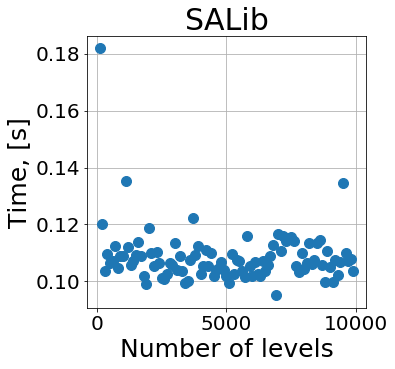

In [10]:
plot_time(num_p,running_time_2,'SALib')